# Linear classifiers

In [ ]:
# Imports

import numpy as np
import matplotlib.pyplot as plt


## Introduction

- Up until now, our classifiers have been designed based on probability density functions.
- In some cases, these classifiers were equivalent to linear discriminant functions.
- Now, we will design linear discriminant functions, *regardless of the underlying distribution*.
- Linear classifiers are incredibl useful:
    - "First thing you try".
    - Often an underlying part of more complex algorithms.

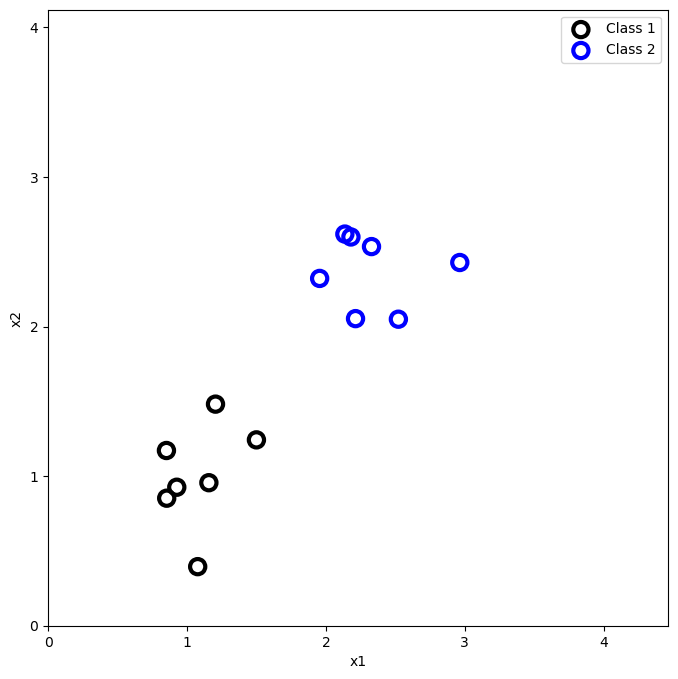

In [14]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # For reproducibility

N = 7

mu1 = np.array([1, 1])
mu2 = np.array([2.5, 2.5])
sigma = np.array([[0.1, 0.0], [0.0, 0.1]])

x1 = np.random.multivariate_normal(mu1, sigma, N)
x2 = np.random.multivariate_normal(mu2, sigma, N)
x = np.concatenate((x1, x2))
y = np.concatenate((np.ones(N), np.zeros(N)))

plt.figure(1, figsize=(8, 8))
plt.scatter(x1[:, 0], x1[:, 1], s=120, facecolors='none',
            edgecolors='black', linewidth=3.0, label='Class 1')
plt.scatter(x2[:, 0], x2[:, 1], s=120, facecolors='none',
            edgecolors='blue', linewidth=3.0, label='Class 2')
plt.xlim(0, np.max(x2[:, 0])+1.5)
plt.ylim(0, np.max(x2[:, 1])+1.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.xticks([0, 1, 2, 3, 4])
plt.yticks([0, 1, 2, 3, 4])
plt.show()

### A high level view of linear classifiers

- Assume we have a training set: $\{\mathbf{x}_i, y_i\}$, where $\mathbf{x} \in \mathbb{R}^d$
- In terms of discriminant functions:
    - $\mathbf{x}$ belongs to class 1 if $g(\mathbf{x})>0$.
    - How to design $g$?.
- Can use:
    - $g(\mathbf{x}) = \mathbf{w}^T\mathbf{x}$.
    - $\mathbf{w} = \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_d \\ w_0 \end{bmatrix}$ and $\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_d \\ 1 \end{bmatrix}$ 

## Mean squared error (MSE) classifier

- Idea:
    - $g(\mathbf{x}_i)=\mathbf{w}^T\mathbf{x}_i \approx y_i$
- How can we find weights that gives the desired output?
- We do this by designing a *cost function* that would encourage this behavior:
    - $J(\mathbf{w})=\frac{1}{2}\mathbb{E}_{\mathbf{x}} \left[ (y-\mathbf{w}^T\mathbf{x}) \right]$
- $\widehat{\mathbf{w}} = \underset{\mathbf{w}}{\operatorname{argmin}}\ J(\mathbf{w})$
- Want:
    - $\frac{\partial}{\partial \mathbf{w}} J(\mathbf{w}) = 0$

### Calculating weights based on MSE loss

Now, we derive an expression for calculating the weights of a linear classifier with a MSE loss.

- Recall:
    - $\mathbb{E}[g(\mathbf{x})] = \int g(\mathbf{x})p(\mathbf{x})d\mathbf{x}$
- Hence:
    - $J(\mathbf{w}) = \frac{1}{2} \int \left[ (y-\mathbf{w}^T\mathbf{x}) \right]^2 p(\mathbf{x})d\mathbf{x}$
- Using the law of total probablity we get:
    - $J(\mathbf{w}) = \frac{1}{2}p(w_1) \int \left[ (***-\mathbf{w}^T\mathbf{x}) \right]^2 p(\mathbf{x}|w_1)d\mathbf{x} + \frac{1}{2}p(w_2) \int \left[ (***-\mathbf{w}^T\mathbf{x}) \right]^2 p(\mathbf{x}|w_2)d\mathbf{x}$
- Remember the chain rule ->
- Followed by a vector derivative:
    - $\frac{\partial}{\partial \mathbf{w}} (1-\mathbf{w}^T\mathbf{x}) = \begin{bmatrix} \hspace{3.0cm} \\  \\ \vdots \\  \\ \end{bmatrix} = -\mathbf{x}$
- Thus:
    - $\frac{\partial}{\partial \mathbf{w}} J(\mathbf{w}) = -\mathbb{E}[\mathbf{x}(y-\mathbf{w}^T\mathbf{x})]=\mathbf{0}$
- Finally:
    - $\widehat{\mathbf{w}} = \mathbf{R}^{-1}_{\mathbf{x}}\mathbb{E}[\mathbf{x}y]$

### Understanding the MSE weights

- Note
    - Second order moment (variance, assuming mean zero).
    - Assumes knwoledge about probability density function!
- Example under assumption normally distributed data:
    - 

## Sum of error squares (SE2) classifier

- Drawback of MSE classifier:
    - Assumes knowledge about the underlying distribution -> why not use Bayes' classifier?
    

## Perceptron

- Drawback of MSE classifier:
    - Assumes knowledge about the underlying distribution -> why not use Bayes' classifier?
    

## Programming exercises

Below are programming exercises assocaited with this lecture. These cell blocks are starting points that loads the data and prepares the problem such that you can get going with the implementation. There are also theoretical exercsies, but due to copyright we cannot shared them here. They will be made available in a private repository connected to the course.


### Problem 2.12 from the book

Repeat problem 2.12 from the book, but using the MSE, SE2, and Perceptron classifier. How do they compare to the density-based classifiers from the previous sessions?

The the Perceptron algorithm to convergence, the data needs to be linearly separable. The easiest way to accomplish this is to change the mean of one of the classes until the two clasess are completely separable.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

number_of_samples_in_each_class = 100

mu1 = np.array([1, 1])
mu2 = np.array([1.5, 1.5])
sigma = np.array([[0.2, 0.0], [0.0, 0.2]])

x_train_1 = np.random.multivariate_normal(mu1, sigma, number_of_samples_in_each_class)
x_train_2 = np.random.multivariate_normal(mu2, sigma, number_of_samples_in_each_class)
x_train = np.concatenate((x_train_1, x_train_2))
y_train = np.concatenate((np.ones(number_of_samples_in_each_class), np.zeros(number_of_samples_in_each_class)))

plt.figure(1, figsize=(8, 8))
plt.scatter(x_train_1[:, 0], x_train_1[:, 1], s=120, facecolors='none',
            edgecolors='black', linewidth=3.0, label='Class 1')
plt.scatter(x_train_2[:, 0], x_train_2[:, 1], s=120, facecolors='none',
            edgecolors='blue', linewidth=3.0, label='Class 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()